In [11]:
#The required libraries are loaded.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
#Import the csv file.
path = 'HI-Small_Trans.csv'
df = pd.read_csv(path)

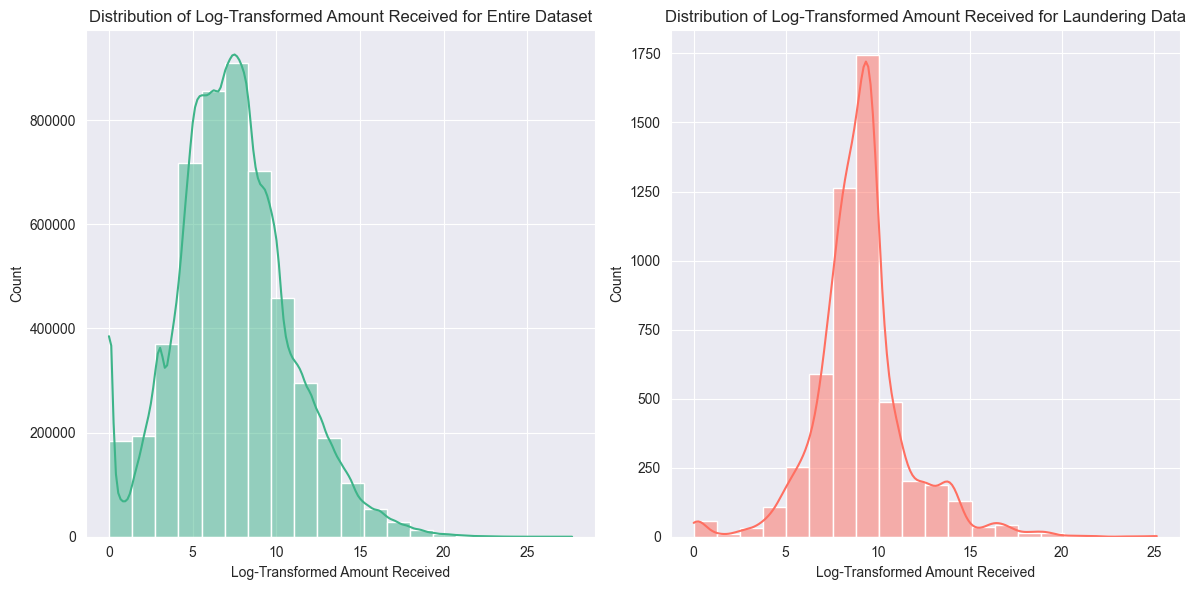

In [13]:
#Log transform the Amount Received column to handle large values.
df['Amount Received Log'] = np.log1p(df['Amount Received'])  # log1p handles zeros safely

#Create the figure and subplots.
plt.figure(figsize=(12, 6))

#Subplot 1: Entire dataset with #3EB489 color.
plt.subplot(1, 2, 1)
sns.histplot(df['Amount Received Log'], bins=20, color='#3EB489', kde=True)
plt.title('Distribution of Log-Transformed Amount Received for Entire Dataset')
plt.xlabel('Log-Transformed Amount Received')
plt.ylabel('Count')

#Subplot 2: Is Laundering == 1 with #FF6F61 color.
plt.subplot(1, 2, 2)
sns.histplot(df[df['Is Laundering'] == 1]['Amount Received Log'], bins=20, color='#FF6F61', kde=True)
plt.title('Distribution of Log-Transformed Amount Received for Laundering Data')
plt.xlabel('Log-Transformed Amount Received')
plt.ylabel('Count')

#Adjust layout and save the plot as a PNG with a white background.
plt.tight_layout()
plt.savefig('log_transformed_amount_received_plots.png', bbox_inches='tight', facecolor='white')
plt.show()

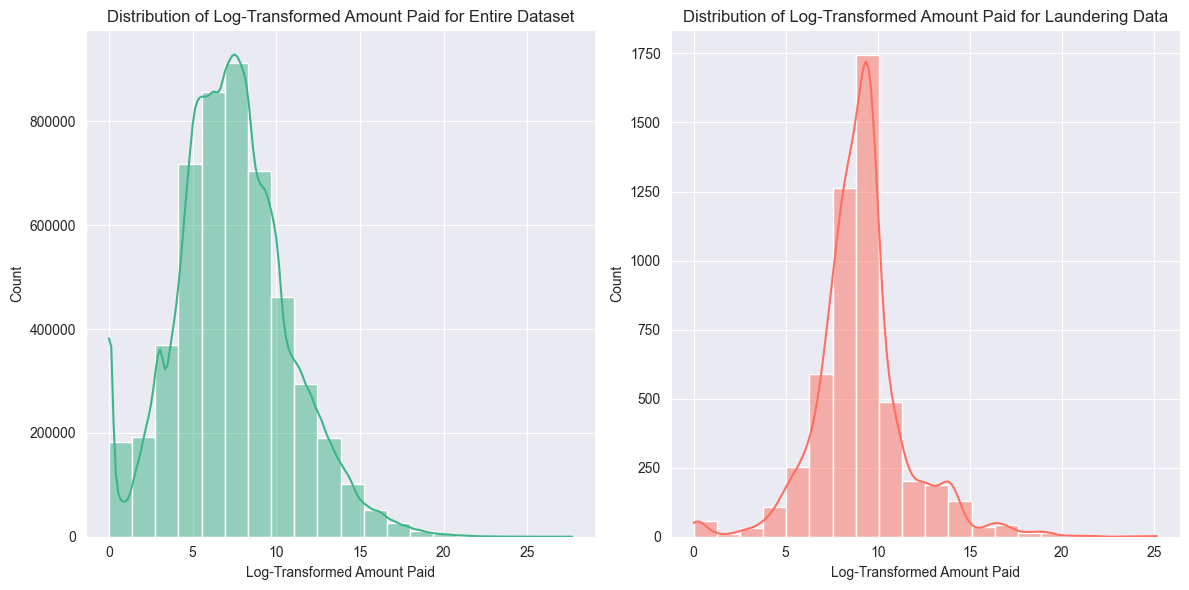

In [14]:
#Log transform the Amount Paid column to handle large values.
df['Amount Paid Log'] = np.log1p(df['Amount Paid'])  # log1p handles zeros safely

#Create the figure and subplots.
plt.figure(figsize=(12, 6))

#Subplot 1: Entire dataset with #3EB489 color.
plt.subplot(1, 2, 1)
sns.histplot(df['Amount Paid Log'], bins=20, color='#3EB489', kde=True)
plt.title('Distribution of Log-Transformed Amount Paid for Entire Dataset')
plt.xlabel('Log-Transformed Amount Paid')
plt.ylabel('Count')

#Subplot 2: Is Laundering == 1 with #FF6F61 color.
plt.subplot(1, 2, 2)
sns.histplot(df[df['Is Laundering'] == 1]['Amount Paid Log'], bins=20, color='#FF6F61', kde=True)
plt.title('Distribution of Log-Transformed Amount Paid for Laundering Data')
plt.xlabel('Log-Transformed Amount Paid')
plt.ylabel('Count')

#Adjust layout and save the plot as a PNG with a white background.
plt.tight_layout()
plt.savefig('log_transformed_amount_paid_plots.png', bbox_inches='tight', facecolor='white')
plt.show()


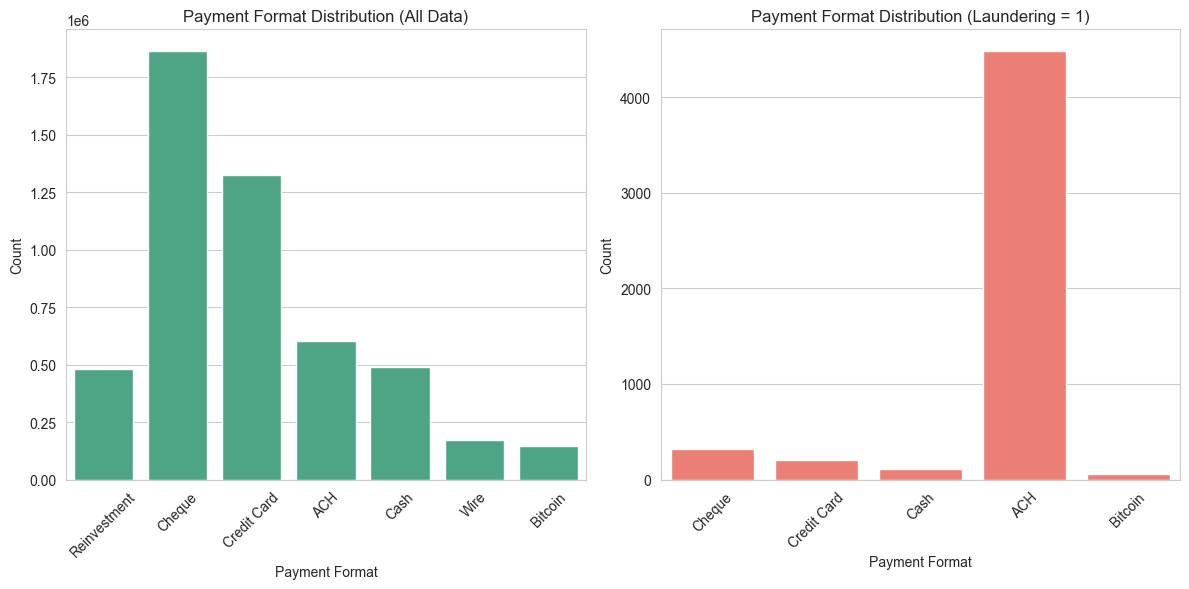

In [8]:
#Create the figure and subplots.
plt.figure(figsize=(12, 6))

#Subplot 1: Entire dataset with #3EB489 color.
plt.subplot(1, 2, 1)
sns.countplot(x='Payment Format', data=df, color='#3EB489')
plt.title('Payment Format Distribution (All Data)')
plt.xlabel('Payment Format')
plt.ylabel('Count')
plt.xticks(rotation=45)

#Subplot 2: Is Laundering == 1 with #FF6F61 color.
plt.subplot(1, 2, 2)
sns.countplot(x='Payment Format', data=df[df['Is Laundering'] == 1], color='#FF6F61')
plt.title('Payment Format Distribution (Laundering = 1)')
plt.xlabel('Payment Format')
plt.ylabel('Count')
plt.xticks(rotation=45)

#Adjust layout and save the plot as a PNG with a white background.
plt.tight_layout()
plt.savefig('payment_format_distribution_plots.png', bbox_inches='tight', facecolor='white')
plt.show()


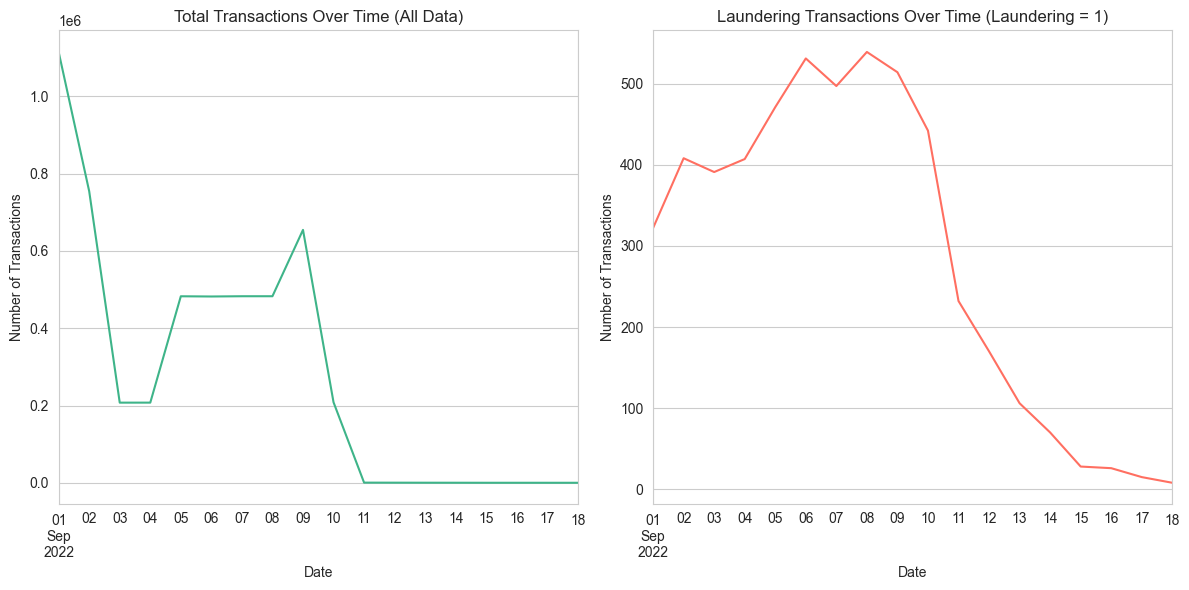

In [9]:
#Ensure the 'Timestamp' column is in datetime format.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#Create the figure and subplots.
plt.figure(figsize=(12, 6))

#Subplot 1: Entire dataset with #3EB489 color.
plt.subplot(1, 2, 1)
df.set_index('Timestamp')['Is Laundering'].resample('D').count().plot(color='#3EB489')
plt.title('Total Transactions Over Time (All Data)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')

#Subplot 2: Is Laundering == 1 with #FF6F61 color.
plt.subplot(1, 2, 2)
df[df['Is Laundering'] == 1].set_index('Timestamp')['Is Laundering'].resample('D').count().plot(color='#FF6F61')
plt.title('Laundering Transactions Over Time (Laundering = 1)')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')

#Adjust layout and save the plot as a PNG with a white background.
plt.tight_layout()
plt.savefig('transactions_over_time_plots.png', bbox_inches='tight', facecolor='white')
plt.show()


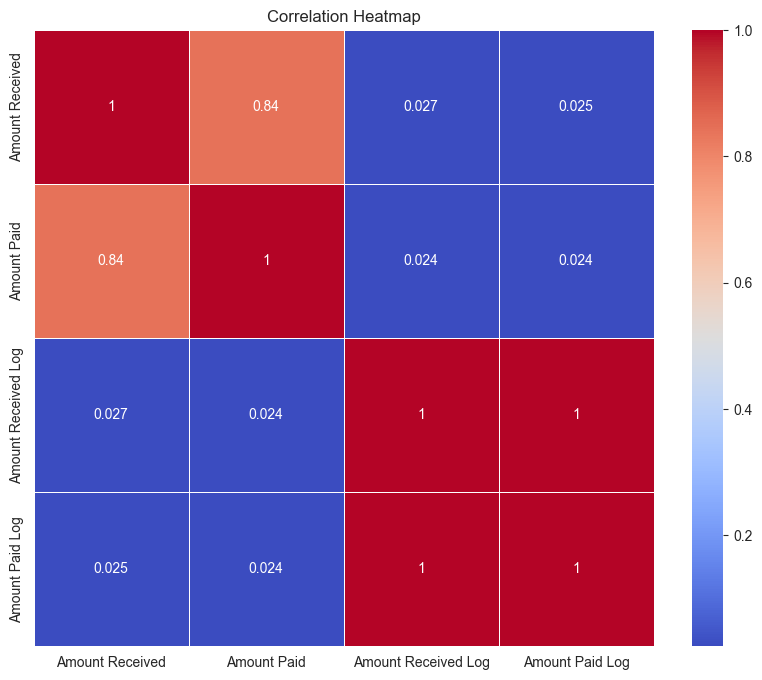

In [15]:
#Select only the numerical columns for correlation analysis.
numerical_cols = ['Amount Received', 'Amount Paid', 'Amount Received Log', 'Amount Paid Log']

#Compute the correlation matrix.
correlation_matrix = df[numerical_cols].corr()

#Plot the heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png', bbox_inches='tight', facecolor='white')
plt.show()


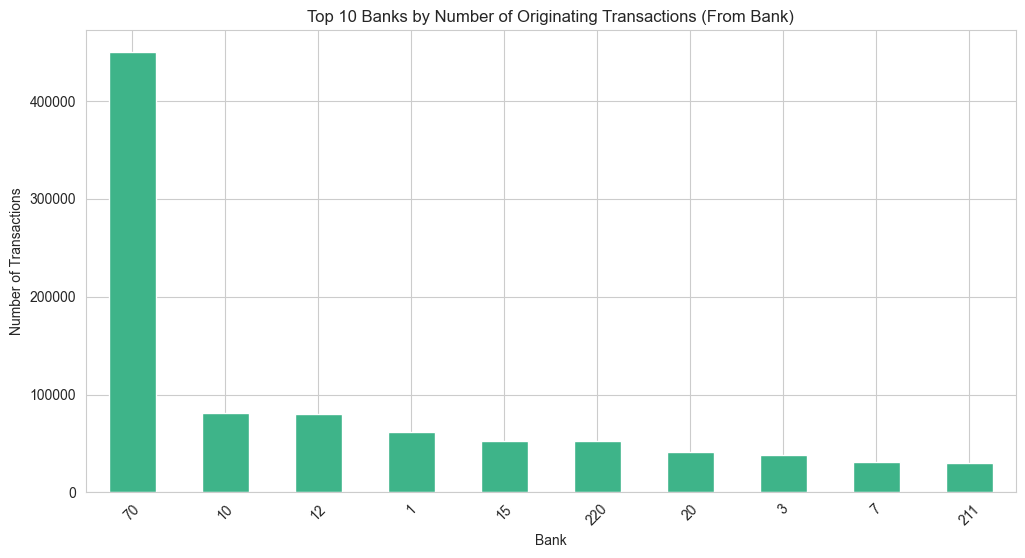

In [13]:
plt.figure(figsize=(12, 6))

#Plot for 'From Bank' transactions using #3EB489.
df['From Bank'].value_counts().head(10).plot(kind='bar', color='#3EB489')
plt.title('Top 10 Banks by Number of Originating Transactions (From Bank)')
plt.xlabel('Bank')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

#Save the plot with the required format.
plt.savefig('top_from_banks_corrected.png', bbox_inches='tight', facecolor='white')
plt.show()


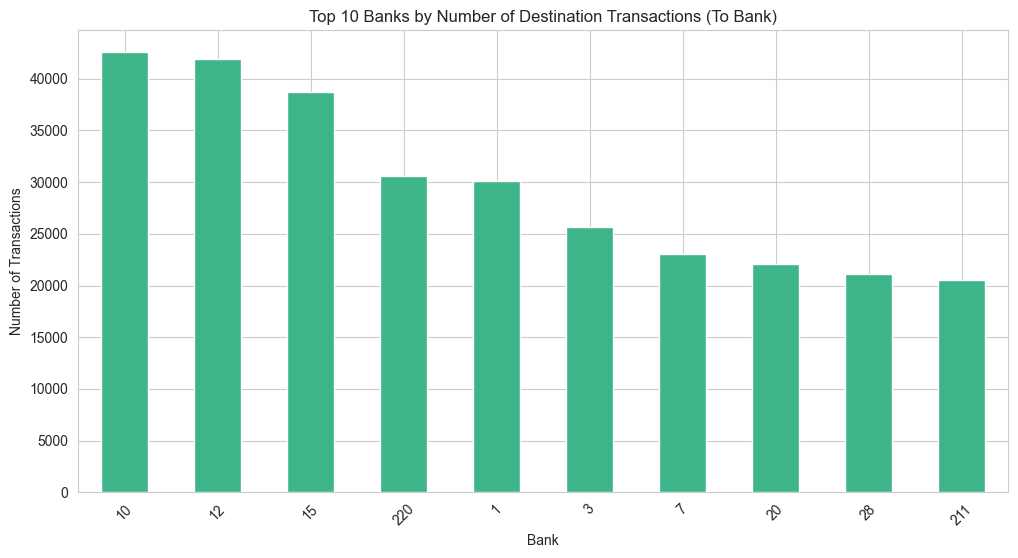

In [14]:
plt.figure(figsize=(12, 6))

#Plot for 'To Bank' transactions using #3EB489.
df['To Bank'].value_counts().head(10).plot(kind='bar', color='#3EB489')
plt.title('Top 10 Banks by Number of Destination Transactions (To Bank)')
plt.xlabel('Bank')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)

#Save the plot with the required format.
plt.savefig('top_to_banks_corrected.png', bbox_inches='tight', facecolor='white')
plt.show()


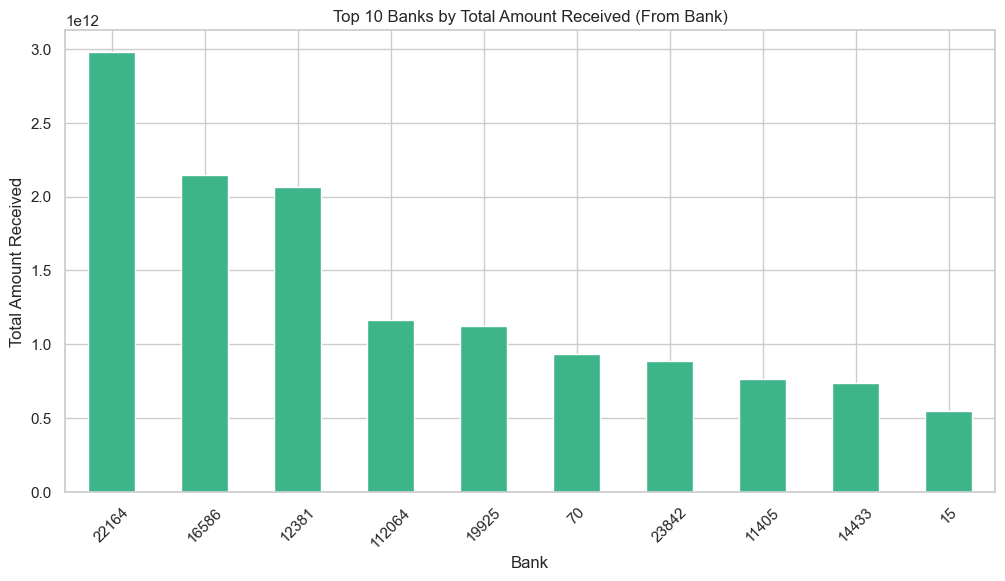

In [28]:
plt.figure(figsize=(12, 6))

#Top 10 banks by total amount received.
df.groupby('From Bank')['Amount Received'].sum().nlargest(10).plot(kind='bar', color='#3EB489')
plt.title('Top 10 Banks by Total Amount Received (From Bank)')
plt.xlabel('Bank')
plt.ylabel('Total Amount Received')
plt.xticks(rotation=45)

#Save the plot with the required format.
plt.savefig('top_banks_amount_received.png', bbox_inches='tight', facecolor='white')
plt.show()


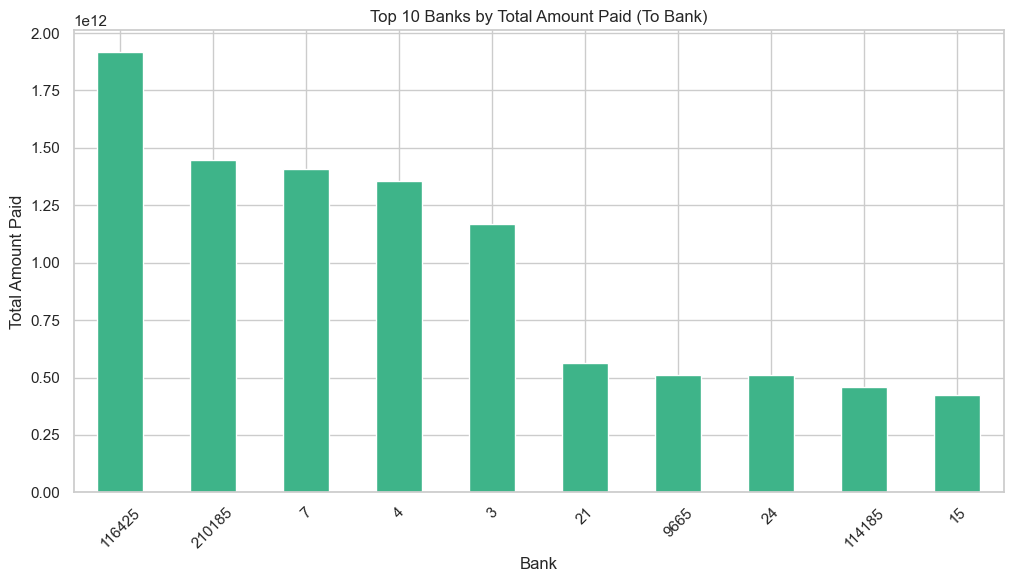

In [30]:
plt.figure(figsize=(12, 6))

#Top 10 banks by total amount paid.
df.groupby('To Bank')['Amount Paid'].sum().nlargest(10).plot(kind='bar', color='#3EB489')
plt.title('Top 10 Banks by Total Amount Paid (To Bank)')
plt.xlabel('Bank')
plt.ylabel('Total Amount Paid')
plt.xticks(rotation=45)

#Save the plot with the required format.
plt.savefig('top_banks_amount_paid.png', bbox_inches='tight', facecolor='white')
plt.show()


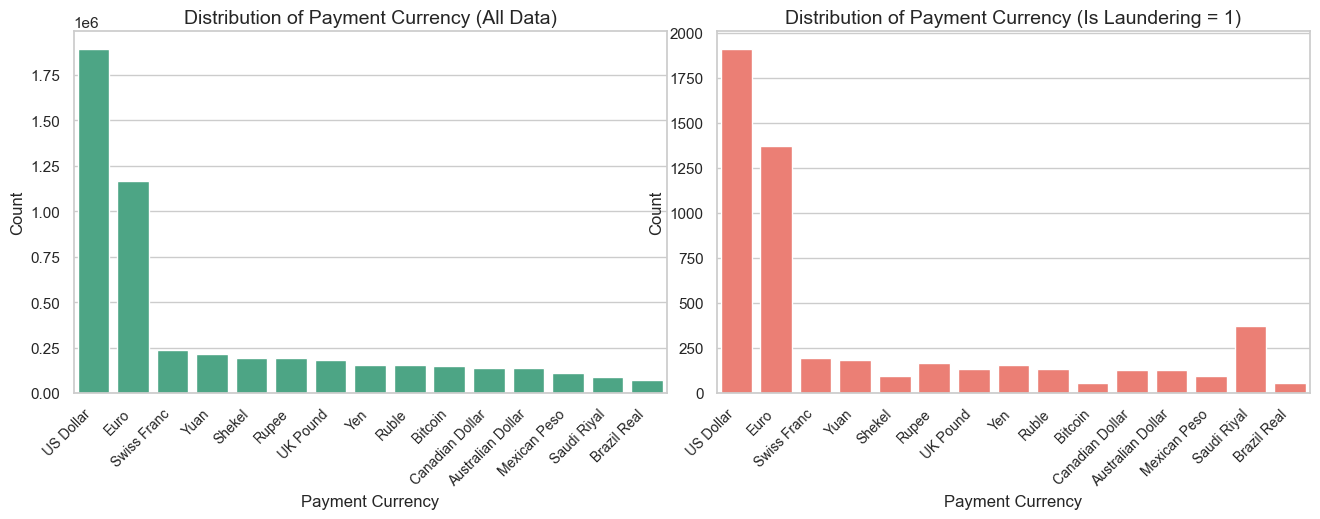

In [54]:
plt.figure(figsize=(14, 6))

#Subplot 1: Distribution of Payment Currency for All Data.
plt.subplot(1, 2, 1)
sns.countplot(x='Payment Currency', data=df, color='#3EB489', order=df['Payment Currency'].value_counts().index)
plt.title('Distribution of Payment Currency (All Data)', fontsize=14)
plt.xlabel('Payment Currency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout(pad=3.0)  # Add padding to make the layout less cramped

#Subplot 2: Distribution of Payment Currency for Is Laundering == 1.
plt.subplot(1, 2, 2)
sns.countplot(x='Payment Currency', data=df[df['Is Laundering'] == 1], color='#FF6F61', order=df['Payment Currency'].value_counts().index)
plt.title('Distribution of Payment Currency (Is Laundering = 1)', fontsize=14)
plt.xlabel('Payment Currency', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)

#Save the plot with the required format.
plt.savefig('payment_currency_distribution.png', bbox_inches='tight', facecolor='white')
plt.show()

In [34]:
#Check if Payment Currency matches Receiving Currency.
df['Currency Match'] = df['Payment Currency'] == df['Receiving Currency']

#Check if Amount Paid matches Amount Received.
df['Amount Match'] = df['Amount Paid'] == df['Amount Received']

#Calculate the proportion of matches for each.
currency_match_percentage = df['Currency Match'].mean() * 100
amount_match_percentage = df['Amount Match'].mean() * 100

print(f"Percentage of transactions where Payment Currency matches Receiving Currency: {currency_match_percentage:.2f}%")
print(f"Percentage of transactions where Amount Paid matches Amount Received: {amount_match_percentage:.2f}%")

Percentage of transactions where Payment Currency matches Receiving Currency: 98.58%
Percentage of transactions where Amount Paid matches Amount Received: 98.58%


In [35]:
#Filter transactions where the Payment Currency does not match the Receiving Currency.
currency_mismatches = df[df['Currency Match'] == False]

#Filter transactions where the Amount Paid does not match the Amount Received.
amount_mismatches = df[df['Amount Match'] == False]

print(f"Number of transactions with currency mismatch: {len(currency_mismatches)}")
print(f"Number of transactions with amount mismatch: {len(amount_mismatches)}")

#Show the first few rows of each mismatch for review.
print("First few rows of currency mismatches:")
print(currency_mismatches[['From Bank', 'To Bank', 'Amount Paid', 'Amount Received', 'Payment Currency', 'Receiving Currency']].head())

print("\nFirst few rows of amount mismatches:")
print(amount_mismatches[['From Bank', 'To Bank', 'Amount Paid', 'Amount Received', 'Payment Currency', 'Receiving Currency']].head())

Number of transactions with currency mismatch: 72170
Number of transactions with amount mismatch: 72158
First few rows of currency mismatches:
       From Bank  To Bank  Amount Paid  Amount Received Payment Currency  \
1173        1362     1362        61.06            52.11        US Dollar   
7156       11318    11318        89.12            76.06        US Dollar   
7925         795      795        12.52            17.69        US Dollar   
8467        1047     1047        22.77            19.43        US Dollar   
11529      11157    11157       115.24            98.34        US Dollar   

      Receiving Currency  
1173                Euro  
7156                Euro  
7925   Australian Dollar  
8467                Euro  
11529               Euro  

First few rows of amount mismatches:
       From Bank  To Bank  Amount Paid  Amount Received Payment Currency  \
1173        1362     1362        61.06            52.11        US Dollar   
7156       11318    11318        89.12          

In [36]:
#Calculate percentage difference between Amount Paid and Amount Received.
df['Amount Difference (%)'] = ((df['Amount Paid'] - df['Amount Received']) / df['Amount Received']) * 100

#Filter only mismatches and sort by the largest discrepancies.
large_discrepancies = df[df['Amount Match'] == False].sort_values(by='Amount Difference (%)', ascending=False)

print("Transactions with the largest discrepancies in Amount Paid vs Amount Received:")
print(large_discrepancies[['From Bank', 'To Bank', 'Amount Paid', 'Amount Received', 'Amount Difference (%)', 'Payment Currency', 'Receiving Currency']].head())

Transactions with the largest discrepancies in Amount Paid vs Amount Received:
         From Bank  To Bank  Amount Paid  Amount Received  \
1670422     311694   311694     79349.55         0.063360   
4829742     311694   311694     79349.55         0.063360   
4843146     311874   311874     42534.59         0.033964   
1562251     311874   311874     42534.59         0.033964   
1624074     318358   318358     18317.49         0.019814   

         Amount Difference (%) Payment Currency Receiving Currency  
1670422           1.252359e+08              Yen            Bitcoin  
4829742           1.252359e+08              Yen            Bitcoin  
4843146           1.252342e+08              Yen            Bitcoin  
1562251           1.252342e+08              Yen            Bitcoin  
1624074           9.244711e+07            Ruble            Bitcoin  


In [37]:
#########################################
###########Data Transformation###########
#########################################

#The "Payment Currency" column contains many differenct currencies. These should be all turned into US dollar in order
#to make some useful comparisons. For each currency, the "Amount Received" and "Amount Paid" will be turned into US dollars.

#Print unique values of the 'Payment Currency' column.
unique_payment_currencies = df['Payment Currency'].unique()
print("Unique values in 'Payment Currency':")
print(list(unique_payment_currencies))

#Define conversion rates to USD (based on data on 22/09/2024).
conversion_rates = {
    'US Dollar': 1.0,        
    'Bitcoin': 62691.60,      #1 Bitcoin = 62691.60 USD
    'Euro': 1.12,             #1 Euro = 1.12 USD
    'Australian Dollar': 0.68, #1 AUD = 0.68 USD
    'Yuan': 0.14,            #1 Yuan = 0.14 USD
    'Rupee': 0.012,          #1 INR = 0.012 USD
    'Yen': 0.0069,            #1 Yen = 0.0069 USD
    'Mexican Peso': 0.052,    #1 MXN = 0.052 USD
    'UK Pound': 1.33,         #1 GBP = 1.33 USD
    'Ruble': 0.011,          #1 Ruble = 0.011 USD
    'Canadian Dollar': 0.74, #1 CAD = 0.74 USD
    'Swiss Franc': 1.18,      #1 CHF = 1.18 USD
    'Brazil Real': 0.18,     #1 BRL = 0.18 USD
    'Saudi Riyal': 0.27,     #1 SAR = 0.27 USD
    'Shekel': 0.26           #1 ILS = 0.2 USD
}

#Define a function to convert 'Amount Received' to USD.
def convert_to_usd_AR(row):
    currency = row['Receiving Currency']
    amount = row['Amount Received']
    return amount * conversion_rates.get(currency, 1.0)

#Define a function to convert 'Amount Paid' to USD.
def convert_to_usd_AP(row):
    currency = row['Payment Currency']
    amount = row['Amount Paid']
    return amount * conversion_rates.get(currency, 1.0)

#Create a new column 'Amount Received (USD)'
df['Amount Received (USD)'] = df.apply(convert_to_usd_AR, axis=1)
df['Amount Paid (USD)'] = df.apply(convert_to_usd_AP, axis=1)

print(df.head())

Unique values in 'Payment Currency':
['US Dollar', 'Bitcoin', 'Euro', 'Australian Dollar', 'Yuan', 'Rupee', 'Yen', 'Mexican Peso', 'UK Pound', 'Ruble', 'Canadian Dollar', 'Swiss Franc', 'Brazil Real', 'Saudi Riyal', 'Shekel']
            Timestamp  From Bank    Account  To Bank  Account.1  \
0 2022-09-01 00:20:00         10  8000EBD30       10  8000EBD30   
1 2022-09-01 00:20:00       3208  8000F4580        1  8000F5340   
2 2022-09-01 00:00:00       3209  8000F4670     3209  8000F4670   
3 2022-09-01 00:02:00         12  8000F5030       12  8000F5030   
4 2022-09-01 00:06:00         10  8000F5200       10  8000F5200   

   Amount Received Receiving Currency  Amount Paid Payment Currency  \
0          3697.34          US Dollar      3697.34        US Dollar   
1             0.01          US Dollar         0.01        US Dollar   
2         14675.57          US Dollar     14675.57        US Dollar   
3          2806.97          US Dollar      2806.97        US Dollar   
4         36682.

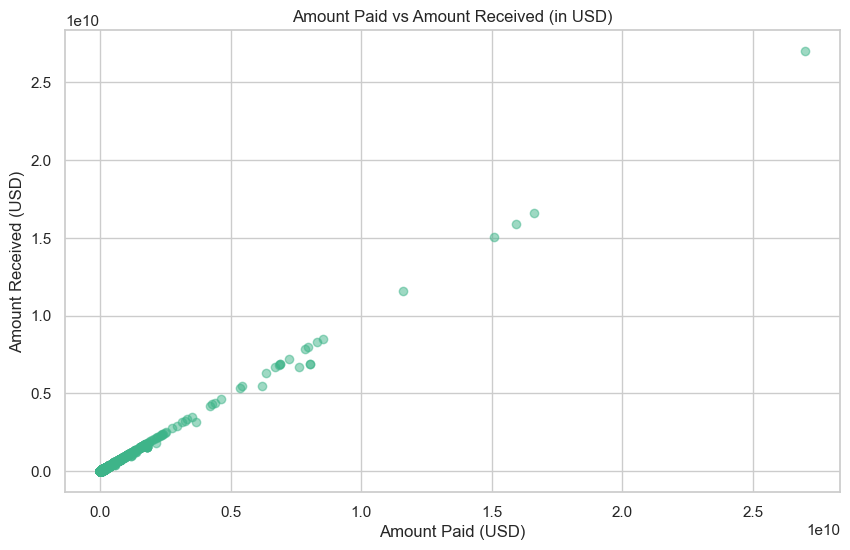

In [38]:
plt.figure(figsize=(10, 6))

#Scatter plot comparing Amount Paid (USD) vs Amount Received (USD).
plt.scatter(df['Amount Paid (USD)'], df['Amount Received (USD)'], color='#3EB489', alpha=0.5)
plt.title('Amount Paid vs Amount Received (in USD)')
plt.xlabel('Amount Paid (USD)')
plt.ylabel('Amount Received (USD)')
plt.grid(True)

plt.savefig('amount_paid_vs_received_usd.png', bbox_inches='tight', facecolor='white')
plt.show()

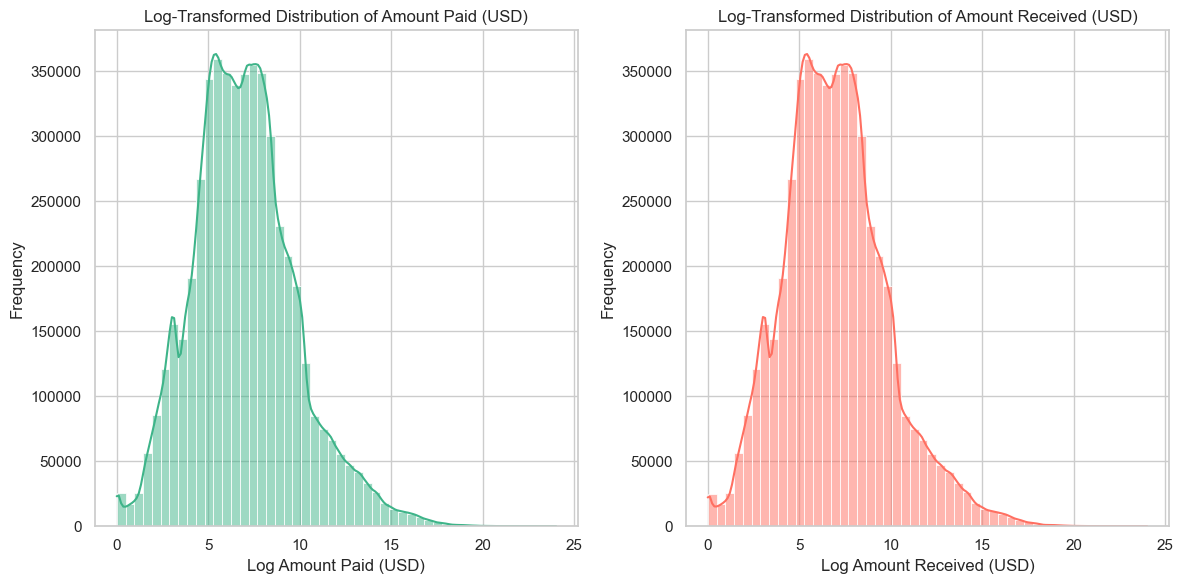

In [40]:
plt.figure(figsize=(12, 6))

#Apply log transformation to avoid issues with zeros.
df['Log Amount Paid (USD)'] = np.log1p(df['Amount Paid (USD)'])
df['Log Amount Received (USD)'] = np.log1p(df['Amount Received (USD)'])

#Subplot 1: Log-transformed Amount Paid (USD).
plt.subplot(1, 2, 1)
sns.histplot(df['Log Amount Paid (USD)'], bins=50, color='#3EB489', kde=True)
plt.title('Log-Transformed Distribution of Amount Paid (USD)')
plt.xlabel('Log Amount Paid (USD)')
plt.ylabel('Frequency')

#Subplot 2: Log-transformed Amount Received (USD).
plt.subplot(1, 2, 2)
sns.histplot(df['Log Amount Received (USD)'], bins=50, color='#FF6F61', kde=True)
plt.title('Log-Transformed Distribution of Amount Received (USD)')
plt.xlabel('Log Amount Received (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('log_amount_paid_received_distribution_usd.png', bbox_inches='tight', facecolor='white')
plt.show()

<Figure size 1000x600 with 0 Axes>

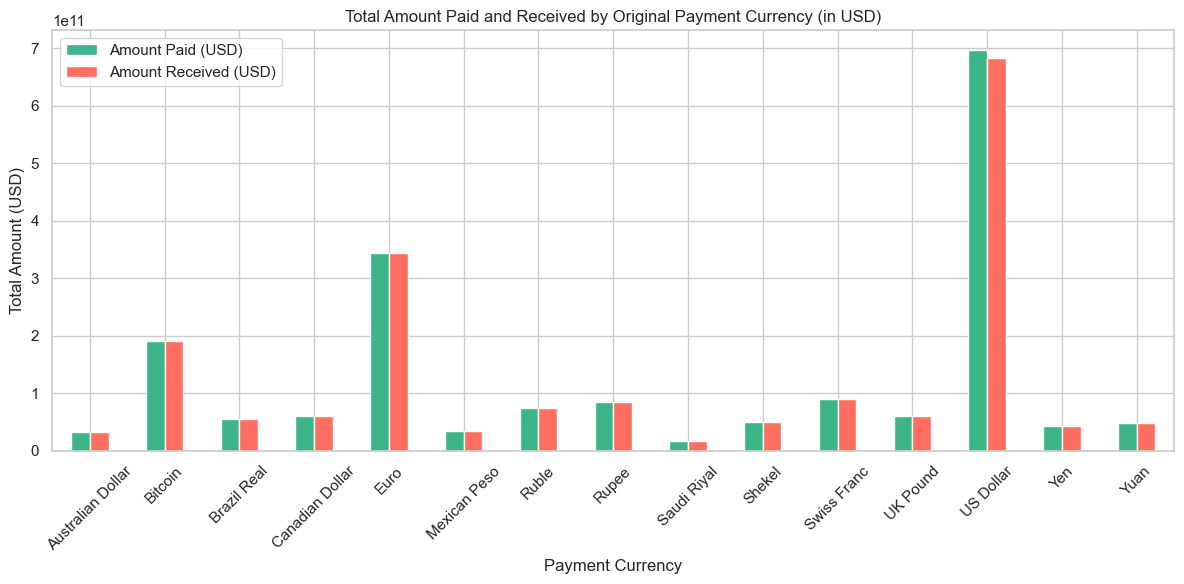

In [41]:
#Group by original Payment Currency and sum the USD amounts.
currency_sums = df.groupby('Payment Currency')[['Amount Paid (USD)', 'Amount Received (USD)']].sum()

#Plot the summed transaction amounts by original currency.
plt.figure(figsize=(10, 6))
currency_sums.plot(kind='bar', color=['#3EB489', '#FF6F61'], figsize=(12, 6))
plt.title('Total Amount Paid and Received by Original Payment Currency (in USD)')
plt.xlabel('Payment Currency')
plt.ylabel('Total Amount (USD)')
plt.xticks(rotation=45)
plt.tight_layout()

#Save the plot with the required format.
plt.savefig('total_amount_by_currency_usd.png', bbox_inches='tight', facecolor='white')
plt.show()

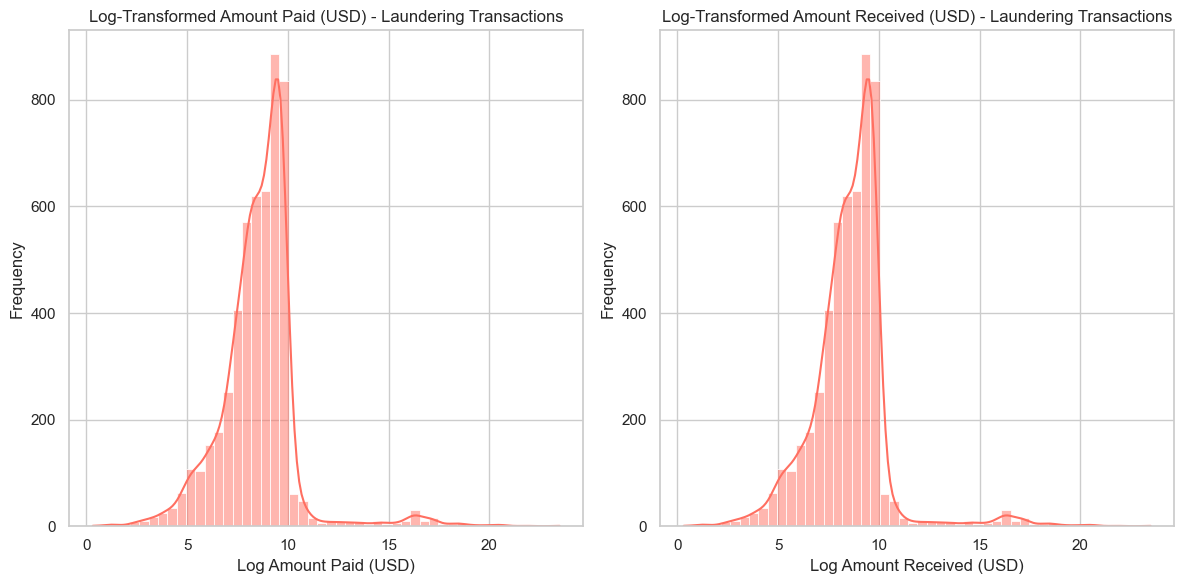

In [44]:
plt.figure(figsize=(12, 6))

#Apply log transformation for Amount Paid and Amount Received for laundering transactions.
df['Log Amount Paid (USD)'] = np.log1p(df['Amount Paid (USD)'])
df['Log Amount Received (USD)'] = np.log1p(df['Amount Received (USD)'])

#Subplot 1: Log-transformed Amount Paid (USD) for laundering transactions.
plt.subplot(1, 2, 1)
sns.histplot(df[df['Is Laundering'] == 1]['Log Amount Paid (USD)'], bins=50, color='#FF6F61', kde=True)
plt.title('Log-Transformed Amount Paid (USD) - Laundering Transactions')
plt.xlabel('Log Amount Paid (USD)')
plt.ylabel('Frequency')

#Subplot 2: Log-transformed Amount Received (USD) for laundering transactions.
plt.subplot(1, 2, 2)
sns.histplot(df[df['Is Laundering'] == 1]['Log Amount Received (USD)'], bins=50, color='#FF6F61', kde=True)
plt.title('Log-Transformed Amount Received (USD) - Laundering Transactions')
plt.xlabel('Log Amount Received (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('log_laundering_transactions_usd.png', bbox_inches='tight', facecolor='white')
plt.show()

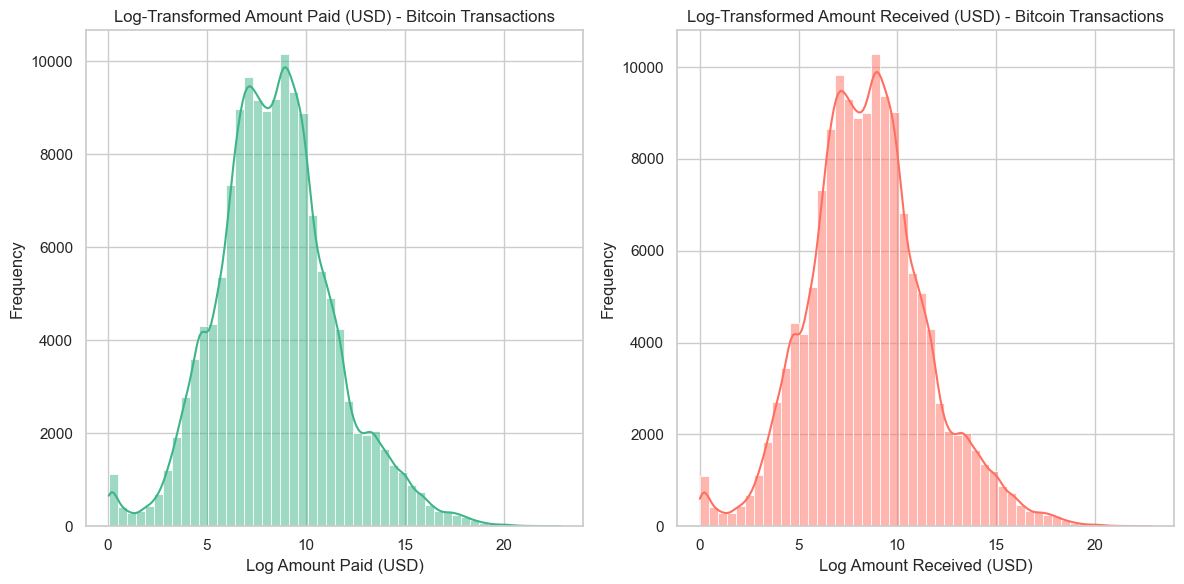

In [47]:
plt.figure(figsize=(12, 6))

#Apply log transformation for Amount Paid and Amount Received for cryptocurrency transactions.
df['Log Amount Paid (USD)'] = np.log1p(df['Amount Paid (USD)'])
df['Log Amount Received (USD)'] = np.log1p(df['Amount Received (USD)'])

#Filter for cryptocurrency transactions.
crypto_transactions = df[df['Payment Currency'] == 'Bitcoin']

#Subplot 1: Log-transformed Amount Paid (USD) for Bitcoin transactions.
plt.subplot(1, 2, 1)
sns.histplot(crypto_transactions['Log Amount Paid (USD)'], bins=50, color='#3EB489', kde=True)
plt.title('Log-Transformed Amount Paid (USD) - Bitcoin Transactions')
plt.xlabel('Log Amount Paid (USD)')
plt.ylabel('Frequency')

#Subplot 2: Log-transformed Amount Received (USD) for Bitcoin transactions.
plt.subplot(1, 2, 2)
sns.histplot(crypto_transactions['Log Amount Received (USD)'], bins=50, color='#3EB489', kde=True)
plt.title('Log-Transformed Amount Received (USD) - Bitcoin Transactions')
plt.xlabel('Log Amount Received (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('log_bitcoin_transactions_usd.png', bbox_inches='tight', facecolor='white')
plt.show()

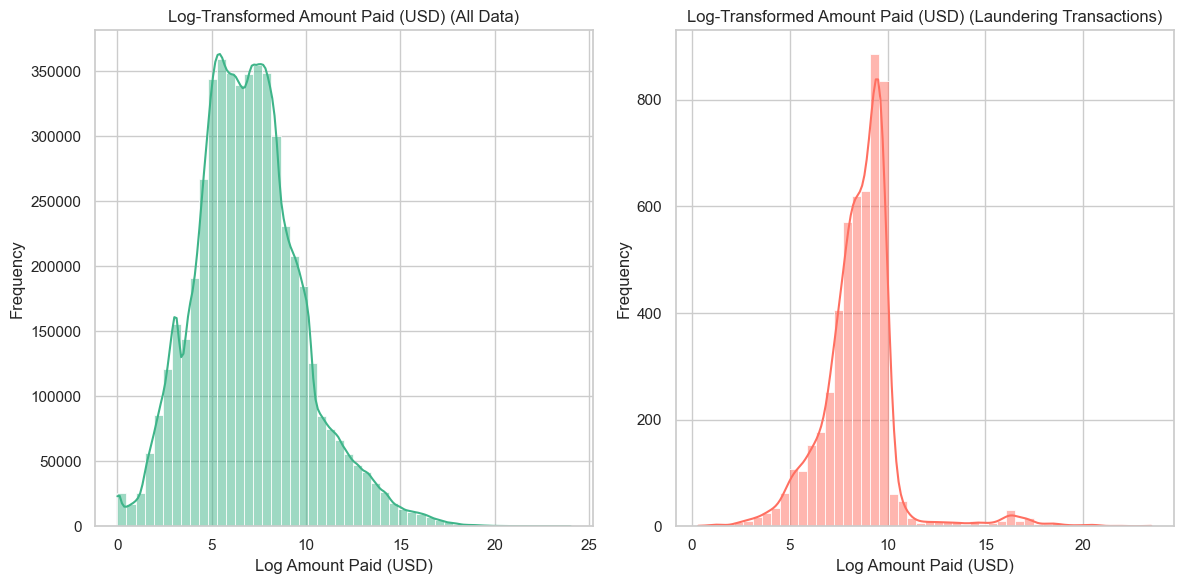

In [48]:
#Apply log transformation for Amount Paid and Amount Received.
df['Log Amount Paid (USD)'] = np.log1p(df['Amount Paid (USD)'])
df['Log Amount Received (USD)'] = np.log1p(df['Amount Received (USD)'])

plt.figure(figsize=(12, 6))

#Subplot 1: Log-transformed Amount Paid (USD) for all data.
plt.subplot(1, 2, 1)
sns.histplot(df['Log Amount Paid (USD)'], bins=50, color='#3EB489', kde=True)
plt.title('Log-Transformed Amount Paid (USD) (All Data)')
plt.xlabel('Log Amount Paid (USD)')
plt.ylabel('Frequency')

#Subplot 2: Log-transformed Amount Paid (USD) for laundering transactions.
plt.subplot(1, 2, 2)
sns.histplot(df[df['Is Laundering'] == 1]['Log Amount Paid (USD)'], bins=50, color='#FF6F61', kde=True)
plt.title('Log-Transformed Amount Paid (USD) (Laundering Transactions)')
plt.xlabel('Log Amount Paid (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('log_transactions_usd_corrected.png', bbox_inches='tight', facecolor='white')
plt.show()

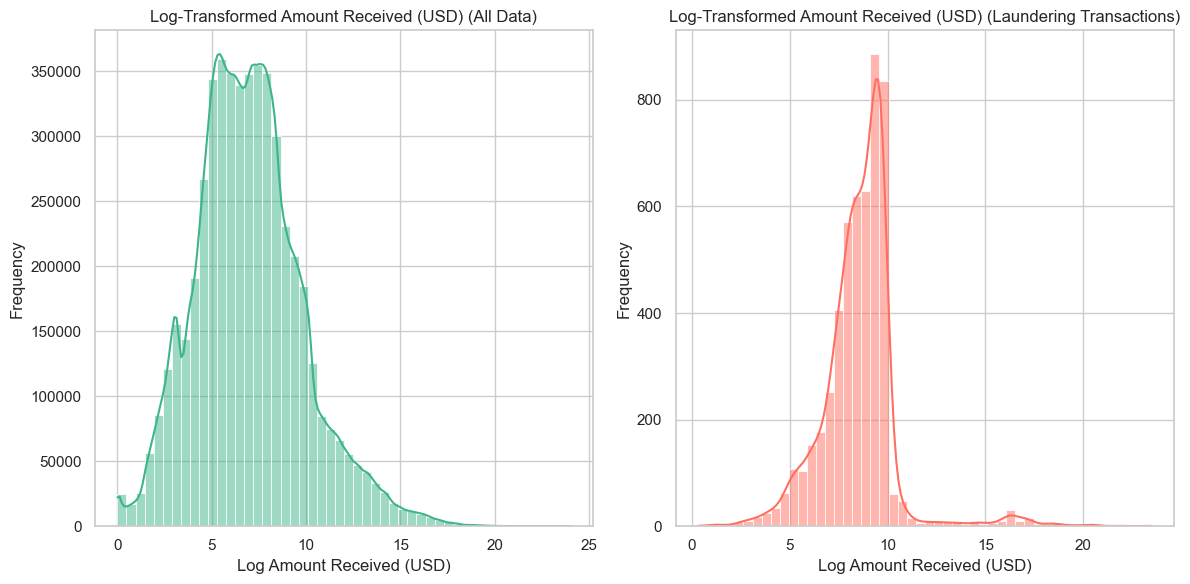

In [49]:
#Apply log transformation for Amount Paid and Amount Received.
df['Log Amount Paid (USD)'] = np.log1p(df['Amount Paid (USD)'])
df['Log Amount Received (USD)'] = np.log1p(df['Amount Received (USD)'])

plt.figure(figsize=(12, 6))

#Subplot 1: Log-transformed Amount Received (USD) for all data.
plt.subplot(1, 2, 1)
sns.histplot(df['Log Amount Received (USD)'], bins=50, color='#3EB489', kde=True)
plt.title('Log-Transformed Amount Received (USD) (All Data)')
plt.xlabel('Log Amount Received (USD)')
plt.ylabel('Frequency')

#Subplot 2: Log-transformed Amount Received (USD) for laundering transactions.
plt.subplot(1, 2, 2)
sns.histplot(df[df['Is Laundering'] == 1]['Log Amount Received (USD)'], bins=50, color='#FF6F61', kde=True)
plt.title('Log-Transformed Amount Received (USD) (Laundering Transactions)')
plt.xlabel('Log Amount Received (USD)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('log_amount_received_usd_corrected.png', bbox_inches='tight', facecolor='white')
plt.show()

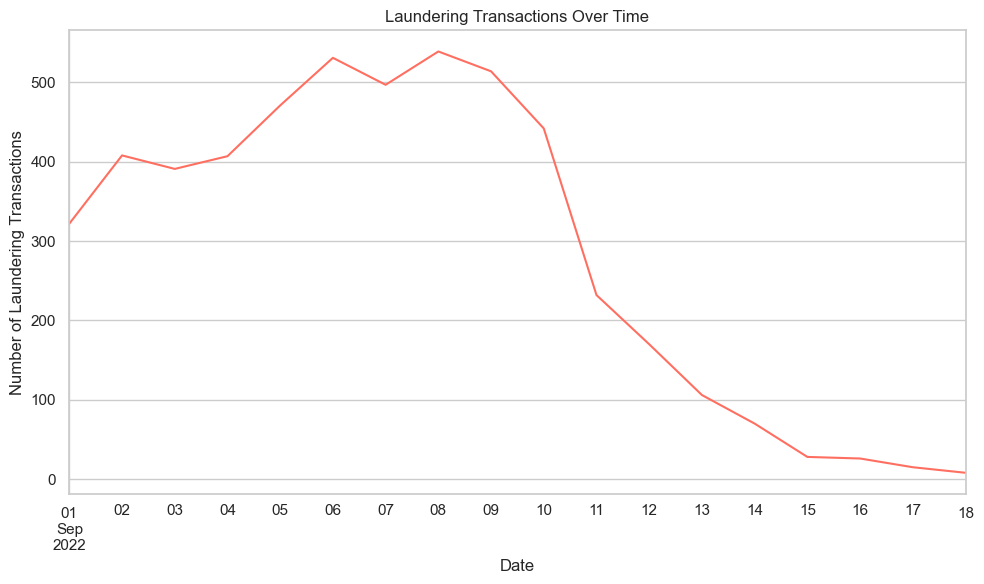

In [51]:
#Convert 'Timestamp' column to datetime.
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#Resample by day to see trends in laundering transactions.
laundering_trend = df[df['Is Laundering'] == 1].set_index('Timestamp').resample('D')['Is Laundering'].count()

plt.figure(figsize=(10, 6))
laundering_trend.plot(color='#FF6F61')
plt.title('Laundering Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Laundering Transactions')
plt.grid(True)
plt.tight_layout()
plt.savefig('laundering_transactions_time_series.png', bbox_inches='tight', facecolor='white')
plt.show()

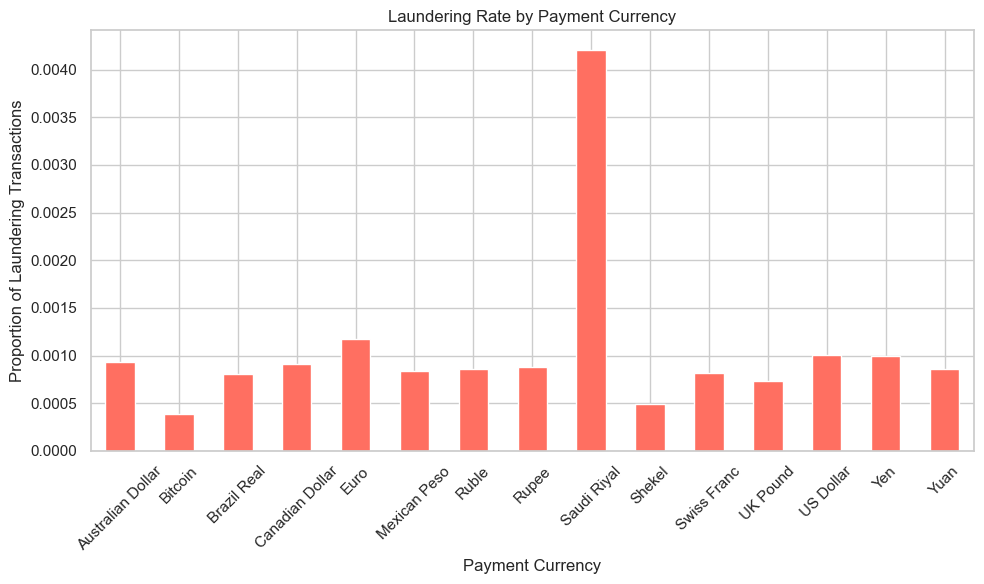

In [55]:
#Proportion of laundering transactions by Payment Currency.
laundering_rate = df.groupby('Payment Currency')['Is Laundering'].mean()

plt.figure(figsize=(10, 6))
laundering_rate.plot(kind='bar', color='#FF6F61')
plt.title('Laundering Rate by Payment Currency')
plt.xlabel('Payment Currency')
plt.ylabel('Proportion of Laundering Transactions')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('laundering_rate_by_currency.png', bbox_inches='tight', facecolor='white')
plt.show()
